# Wind Turbine Power Production
###  Project assessment
#### [Machine Learning and Statistics Module GMIT 2020 ]

---

<img align="left" width="300" src="https://image.flaticon.com/icons/png/512/1778/1778210.png">
<br>

<br>

Lecturer: *Ian McLoughlin (https://github.com/ianmcloughlin)*

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents

* [Overview](#overview)
* [General Setup](#setup)
* [Loading Data](#loading_data)
* [](#)
* [](#)
* [](#)
* [](#)

<br>

### Overview <a name="overview"></a>
___

<br>

### General Setup <a name="setup"></a>
___

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

%matplotlib inline

In [2]:
# Theme for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5, )

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Loading Data <a name="loading_data"></a>
___

> [1] [Adjusting Size of Seaborn Plot](https://stackoverflow.com/questions/51502927/adjusting-size-of-seaborn-plot)

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("powerproduction.csv")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
# Check for empty values.
df.isnull().values.any()

False

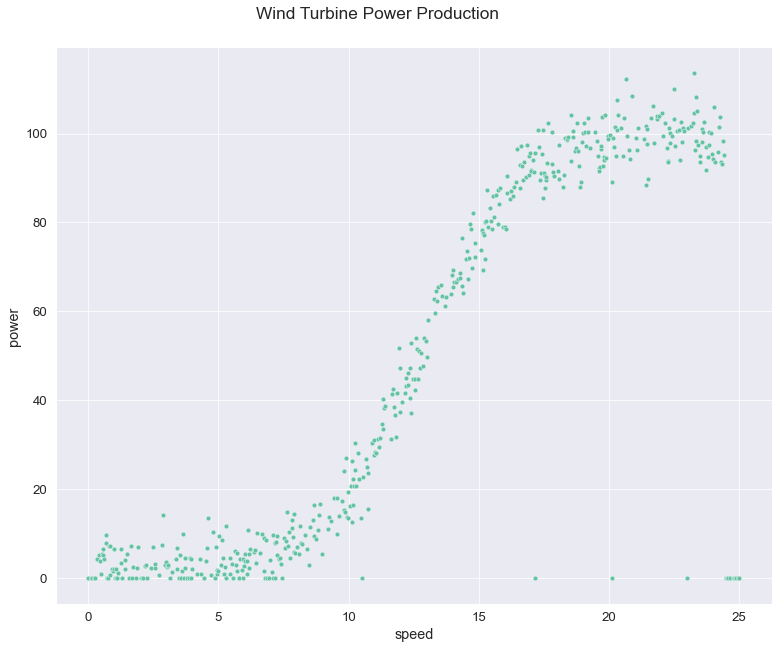

In [5]:
# Plot data.
sns.relplot(data=df, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.suptitle("Wind Turbine Power Production", y=1.02)

# Show the plot.
plt.show()

The above plot shows that the data follows a non-linear model. The relationship between Power and Speed predominantly take "S"-shape (sigmoid curve). The power rises dramatically with speed over about 8 m/s and slows when the speed reaches about 17 m/s.

Additionally, we can see some outliners where the speed is above 10 m/s, however, the power is still 0. By removing this outliners we can tidy our data set. [2]

> [2] [Delete rows based on multiple conditions; including other column conditionals](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)

In [6]:
df_new = df.drop(df[(df.power == 0) & (df.speed > 10)].index)
df_new

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


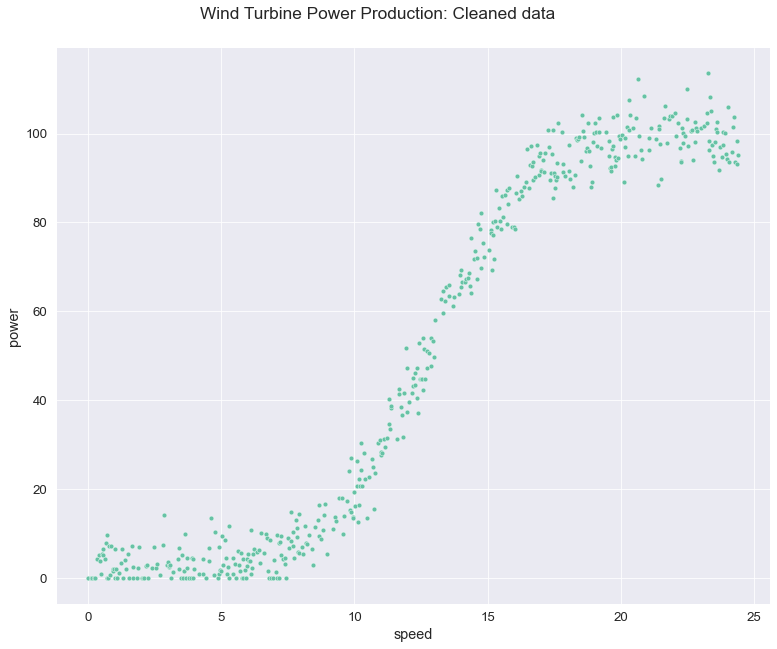

In [10]:
# Plot data.
sns.relplot(data=df_new, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.suptitle("Wind Turbine Power Production: Cleaned data", y=1.02)

# Show the plot.
plt.show()

<br>

###  k-Nearest Neighbors.
___


<br>

### Neural Networks.
___


In [8]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(100, input_shape=(1,), activation='relu', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile("adam", loss='mean_squared_error')

In [9]:
# Train the neural network on our training data.
model.fit(df['speed'], df['power'], epochs=500)

Epoch 1/500
16/16 [==============================] - 2s 5ms/step - loss: 3876.9278
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 4122.8491
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 3685.1538
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 3913.9508
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 4003.4047: 0s - loss: 4016.87
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 4051.2850
Epoch 7/500
16/16 [==============================] - 0s 6ms/step - loss: 3761.3332
Epoch 8/500
16/16 [==============================] - 0s 5ms/step - loss: 4064.3691
Epoch 9/500
16/16 [==============================] - 0s 5ms/step - loss: 4066.1694
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 4181.9467
Epoch 11/500
16/16 [==============================] - 0s 5ms/step - loss: 3905.6503
Epoch 12/500
16/16 [==============================] - 0s 5ms/step

16/16 [==============================] - 0s 7ms/step - loss: 4192.6839
Epoch 99/500
16/16 [==============================] - 0s 10ms/step - loss: 4196.9107
Epoch 100/500
16/16 [==============================] - 0s 10ms/step - loss: 3967.1734
Epoch 101/500
16/16 [==============================] - 0s 8ms/step - loss: 3814.0992
Epoch 102/500
16/16 [==============================] - 0s 10ms/step - loss: 3732.1013
Epoch 103/500
16/16 [==============================] - 0s 8ms/step - loss: 3923.0158
Epoch 104/500
16/16 [==============================] - 0s 7ms/step - loss: 3915.4955
Epoch 105/500
16/16 [==============================] - 0s 8ms/step - loss: 4181.1050
Epoch 106/500
16/16 [==============================] - 0s 9ms/step - loss: 3748.2029
Epoch 107/500
16/16 [==============================] - 0s 9ms/step - loss: 4062.2813
Epoch 108/500
16/16 [==============================] - 0s 8ms/step - loss: 3943.0104
Epoch 109/500
16/16 [==============================] - 0s 10ms/step - loss: 4

KeyboardInterrupt: 